In [3]:
datadir = '/Users/krithigamurugavel/Downloads/gem5/Gem5_Plots/results'

In [4]:
%matplotlib notebook
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

In [5]:
import matplotlib

In [12]:
Configurations = ['run_config1','run_confgi2','run_config3']

all_arch = ['X86','ARM','RISCV']
zm_arch = ['X86']


all_memory_models = ['Slow', 'SingleCycle', 'Inf', 'Slow']
zm_memory_models = ['Slow']



all_gem5_cpus = ['Simple','DefaultO3','Minor']
zm_gem5_cpus = ['DefaultO3','Simple']

cache_modified = ['L1D_cache', 'L2_cache', 'L1I_cache']
zm_gem5_cachemodified = ['L1_cache']

L1D_size= ['32kB','4kB','64kB']
L2_size = []

all_benchmarks_names = ['CCa','CCe','CCm','CCh','CCh_st','CRd','CRm','CRf','CF1','CS1','CS3','EI','EF','ED1','EM1','EM5',
                     'DP1d','DP1f','DPcvt','DPTd','DPT','MI','MIM','MIM2','MIP','ML2','ML2_BW_ld',
                    'MM']
all_benchmarks =['X86/run_micro/Slow/'+ bm for bm in all_benchmarks_names]

all_Memory_System_benchmarks_names = ['MC','MCS','MI','MIM','MIM2','MIP','MD','ML2','ML2_BW_ld','ML2_BW_st','MM','MM_st']
all_Memory_System_benchmarks =['X86/run_config3/Slow/'+ bm for bm in all_Memory_System_benchmarks_names]

Memory_L1_cache_performance_names = ['MI','MIM','MIM2','MD']
Memory_L1_cache_performance =['X86/run_config3/Slow/'+ bm for bm in Memory_L1_cache_performance_names]

Memory_conflictmisses_names = ['MC','MCS']
Memory_conflictmisses =['X86/run_config3/Slow/'+ bm for bm in Memory_conflictmisses_names]

Memory_L2_cache_performance_names=['ML2','ML2_BW_ld','ML2_BW_st','ML2_BW_ldst','ML2_st']
Memory_L2_cache_performance =['X86/run_config3/Slow/'+ bm for bm in Memory_L2_cache_performance_names]

Memory_InstructionCache_performance_names =['MIP']
Memory_InstructionCache_performance =['X86/run_config3/Slow/'+ bm for bm in Memory_InstructionCache_performance_names]

Main_Memory_names = ['MM','MM_st']
Main_Memory = ['X86/run_config3/Slow/'+ bm for bm in Main_Memory_names]







In [13]:
#Function to extract stats
def gem5GetStat(filename, stat):
    filename = os.path.join(datadir, '', filename, 'stats.txt').replace('\\','/')
    with open(filename) as f:
        r = f.read()
        if len(r) < 10: return 0.0
        start = r.find(stat) + len(stat) + 1
        end = r.find('#', start)
        print(r[start:end])
        return float(r[start:end])

In [18]:

rows = []
for bm in all_Memory_System_benchmarks: 
    for sys in zm_gem5_cpus:
        for cache_modified in zm_gem5_cachemodified:
            for size in L1D_size:
                rows.append([bm,sys,cache_modified,size,
                                                 gem5GetStat(bm+'/'+sys+'/' +cache_modified +'/'+size, 'sim_ticks')/333, #1000
                                                 gem5GetStat(bm+'/'+sys+'/' +cache_modified +'/'+size, 'sim_insts'),
                                                 gem5GetStat(bm+'/'+sys+'/' +cache_modified +'/'+size, 'sim_ops'),
                                                 gem5GetStat(bm+'/'+sys+'/' +cache_modified +'/'+size, 'sim_ticks')/1e9,
                                                 gem5GetStat(bm+'/'+sys+'/' +cache_modified +'/'+size, 'host_op_rate'),
                                                 # data for conflicting miss benchmark
                                                 gem5GetStat(bm+'/'+sys+'/' +cache_modified +'/'+size,'system.cpu.l1d.overall_miss_rate::total'),
                                                 gem5GetStat(bm+'/'+sys+'/' +cache_modified +'/'+size,'system.cpu.l1d.overall_mshr_miss_rate::total'),
                                                 gem5GetStat(bm+'/'+sys+'/' +cache_modified +'/'+size,'system.cpu.l1d.replacements'),
                                                 gem5GetStat(bm+'/'+sys+'/' +cache_modified +'/'+size,'system.cpu.l1d.overall_avg_miss_latency::total'),
                                                 gem5GetStat(bm+'/'+sys+'/' +cache_modified +'/'+size,'system.l2cache.overall_miss_rate::total '),
                                                 gem5GetStat(bm+'/'+sys+'/' +cache_modified +'/'+size,'system.l2cache.overall_mshr_miss_rate::total'),
                                                 gem5GetStat(bm+'/'+sys+'/' +cache_modified +'/'+size,'system.l2cache.replacements'),
                                                 gem5GetStat(bm+'/'+sys+'/' +cache_modified +'/'+size,'system.l2cache.overall_miss_latency::total'),
                                                 #only O3 stats
                                                 #gem5GetStat(bm+'/'+arch+ '/'+sys,'system.cpu.memDep0.conflictingLoads '),
                                                 #gem5GetStat(bm+'/'+arch+ '/'+sys,'system.cpu.memDep0.conflictingStores'),
                                                 #L1 cache performance 
                                                 gem5GetStat(bm+'/'+sys+'/' +cache_modified +'/'+size,'system.cpu.l1d.ReadReq_accesses::total'),
                                                 #I-Cache performance 
                                                 gem5GetStat(bm+'/'+sys+'/' +cache_modified +'/'+size,'system.cpu.l1i.ReadReq_accesses::total'),
                                                 gem5GetStat(bm+'/'+sys+'/' +cache_modified +'/'+size,'system.cpu.l1i.overall_miss_rate::total'),
                                                 gem5GetStat(bm+'/'+sys+'/' +cache_modified +'/'+size,'system.cpu.l1i.overall_miss_latency::total'),
                                                 gem5GetStat(bm+'/'+sys+'/' +cache_modified +'/'+size,'system.cpu.l1i.overall_mshr_miss_rate::total'),
                                                 gem5GetStat(bm+'/'+sys+'/' +cache_modified +'/'+size,'system.cpu.l1i.replacements'),
                                                 # L2 Cache
                                                 gem5GetStat(bm+'/'+sys+'/' +cache_modified +'/'+size,'system.l2cache.overall_miss_rate::total'),
                                                 gem5GetStat(bm+'/'+sys+'/' +cache_modified +'/'+size,'system.l2cache.overall_miss_latency::total'),
                                                 gem5GetStat(bm+'/'+sys+'/' +cache_modified +'/'+size,'system.l2cache.overall_avg_miss_latency::total'),
                                                 gem5GetStat(bm+'/'+sys+'/' +cache_modified +'/'+size,'system.l2cache.ReadSharedReq_miss_rate::total'),
                                                 gem5GetStat(bm+'/'+sys+'/' +cache_modified +'/'+size,'system.l2cache.ReadExReq_miss_rate::total'),
                                                 gem5GetStat(bm+'/'+sys+'/' +cache_modified +'/'+size,'system.l2cache.demand_accesses::total'),
                                                 gem5GetStat(bm+'/'+sys+'/' +cache_modified +'/'+size,'system.l2cache.demand_accesses::.cpu.data'),
                                                 gem5GetStat(bm+'/'+sys+'/' +cache_modified +'/'+size,'system.l2cache.demand_accesses::.cpu.inst'),
                                                 #bandwidth limited l2 access
                                                 gem5GetStat(bm+'/'+sys+'/' +cache_modified +'/'+size,'system.l2cache.demand_miss_rate::total'),
                                                 gem5GetStat(bm+'/'+sys+'/' +cache_modified +'/'+size,'system.l2cache.demand_mshr_miss_rate::total'),
                                                 gem5GetStat(bm+'/'+sys+'/' +cache_modified +'/'+size,'system.l2cache.demand_miss_rate::total'),
                                                 #bandwidth limited load and store
                                                 # only O3 stats :gem5GetStat(bm+'/'+arch+ '/'+sys,'system.cpu.iew.lsq.thread0.forwLoads '),
                                                 #memory
                                                gem5GetStat(bm+'/'+sys+'/' +cache_modified +'/'+size,'system.mem_ctrl.avgMemAccLat '),
                                                gem5GetStat(bm+'/'+sys+'/' +cache_modified +'/'+size,'system.mem_ctrl.busUtil'),
                                                gem5GetStat(bm+'/'+sys+'/' +cache_modified +'/'+size,'system.mem_ctrl.bw_total::total '),
                                                gem5GetStat(bm+'/'+sys+'/' +cache_modified +'/'+size,'system.mem_ctrl.totBusLat '),
                                                #memory with store
                                                gem5GetStat(bm+'/'+sys+'/' +cache_modified +'/'+size,'system.mem_ctrl.avgWrBW '),
                                                  #bandwidth limited load and store
                                                 # only O3 stats :
                                               # gem5GetStat(bm+'/'+sys,'system.cpu.iew.lsq.thread0.forwLoads '),
                                                #gem5GetStat(bm+'/'+sys,'system.cpu.iew.lsq.thread0.blockedLoads')
                                                ])
                    
vrg_df3 = pd.DataFrame(rows, columns=['benchmark','cpu','cache_modified','size',
                                      'cycles', 'instructions', 'ops','time','host_op_rate',
                                      'overall_l1d_missrate','overall_l1d_mshr_missrate','l1d_replacements','l1d_avg_latency','overall_l2_missrate','overall_l2_mshr_missrate','l2_replacements','l2_avg_latency',
                                      'l1d_ReadReq_access',
                                      '11i_ReadReq_access','overall_l1i_miss_rate','l1i_avg_misslatency','overall_l1i_mshr_missrate','l1i_replacements',
                                      'l2cache_overall_missrate','l2cache_overall_misslatency','l2cache_avgmissrate','l2_ReadSharedReq_missrate','l2_ReadExReq_missrate','l2_demand_access_total','l2_demand_access_data','l2_demand_access_inst',
                                      'l2_demand_missrate','l2_demand_mshr_miss_rate','l2_demand_totalmissrate',
                                      'avgmemaccesslatency','busutilit','bandwidthtotal','totalbuslatency',
                                      'averagewritebandwidth'])

vrg_df3['ipc'] = vrg_df3['instructions']/vrg_df3['cycles']
vrg_df3['cpi']= 1/vrg_df3['ipc']

                                   46194426                       
                                     120823                       
                                       241860                       
                                   46194426                       
                                  204018                       
     0.139791                       
    0.072614                       
                     5647                       
 7471.846458                       
    0.113758                       
    0.113758                       
                        0                       
    43122834                       
         80196                       
         18947                       
     0.032565                       
    30720249                       
    0.022220                       
                       10                       
     0.113758                       
    43122834                       
59809.755895                       
    0.09

                     4347                       
 8115.884153                       
    0.143098                       
    0.143098                       
                        0                       
    34203096                       
         66636                       
        131391                       
     0.002595                       
    18067581                       
    0.002595                       
                        4                       
     0.143098                       
    34203096                       
50298.670588                       
    0.121730                       
    0.921260                       
           4752                       
        4411                       
         341                       
      0.143098                       
    0.143098                       
      0.143098                       
               22817.05                       
                         1.91                       
           366774875

    85234347                       
49932.247803                       
    0.121961                       
    0.936000                       
          13162                       
       12818                       
         344                       
      0.129692                       
    0.129692                       
      0.129692                       
               22448.19                       
                         3.60                       
           691481621                       
                   5687724                       
                        0.00                       
                                  157716792                       
                                      30927                       
                                        64048                       
                                  157716792                       
                                  271283                       
     0.679629                       
    0.679629    

                                      1126552                       
                                 1576397691                       
                                  129316                       
     0.913538                       
    0.911457                       
                    61594                       
21625.065949                       
    0.270347                       
    0.270347                       
                      659                       
  1140758100                       
         67413                       
          2783                       
     0.216673                       
    28257048                       
    0.153791                       
                       15                       
     0.270347                       
  1140758100                       
66930.186576                       
    0.269036                       
           1                       
          63045                       
       62618                   

                                 5488075764                       
                                    7484414                       
                                     12740193                       
                                 5488075764                       
                                  178879                       
     0.074341                       
    0.055764                       
                    98516                       
50121.625561                       
    0.995225                       
    0.995225                       
                    82620                       
  4979272410                       
        757729                       
       1020389                       
     0.000617                       
    33147819                       
    0.000430                       
                       13                       
     0.995225                       
  4979272410                       
50299.745535                       
    0.99

In [15]:
def draw_vertical_line(ax, xpos, ypos):
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos],
                      transform=ax.transAxes, color='black', lw = 1)
    line.set_clip_on(False)
    ax.add_line(line)

In [19]:
def doplot_memory_benchmarks(size,benchmarks,benchmark_names,stat,norm=True):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
   # gs = fig.add_gridspec(2, 2)
   # ax1 = fig.add_subplot(gs[0, 0])
   # ax2 = fig.add_subplot(gs[1, 0])
    #ax1 = fig1.add_subplot(2, 2, 1)
    #fig1.add_subplot(224, sharex=ax1)
    i = 0
    for s in size:
        for bm in benchmarks:
            base = vrg_df3[(vrg_df3['benchmark']==bm)][stat].iloc[0] if norm else 1
            for j,sys in enumerate(zm_gem5_cpus):
                d = vrg_df3[(vrg_df3['cpu']==sys) & (vrg_df3['benchmark']==bm) & (vrg_df3['size']==s)]
                ax.bar(i, d[stat].iloc[0]/base, color='C'+str(j))
                i += 1
            i += 1
    for i,sys in enumerate(zm_gem5_cpus):
        plt.bar(0,0,color='C'+str(i), label=sys)
    new_names = benchmark_names + benchmark_names + benchmark_names
    plt.xticks(np.arange(len(new_names))*(len(zm_gem5_cpus)+1)+i/2, new_names, rotation=40, ha='right')
    draw_vertical_line(ax, 0, -0.1)
    draw_vertical_line(ax, 0.347, -0.1)
    draw_vertical_line(ax, 0.66, -0.1)
    draw_vertical_line(ax, 1, -0.1)
    ax.text(0.25, -0.25, size[0], ha ='center', transform=ax.transAxes)
    ax.text(0.5, -0.25, size[1], ha ='center', transform=ax.transAxes)
    ax.text(0.75, -0.25, size[2], ha ='center', transform=ax.transAxes)

<IPython.core.display.Javascript object>


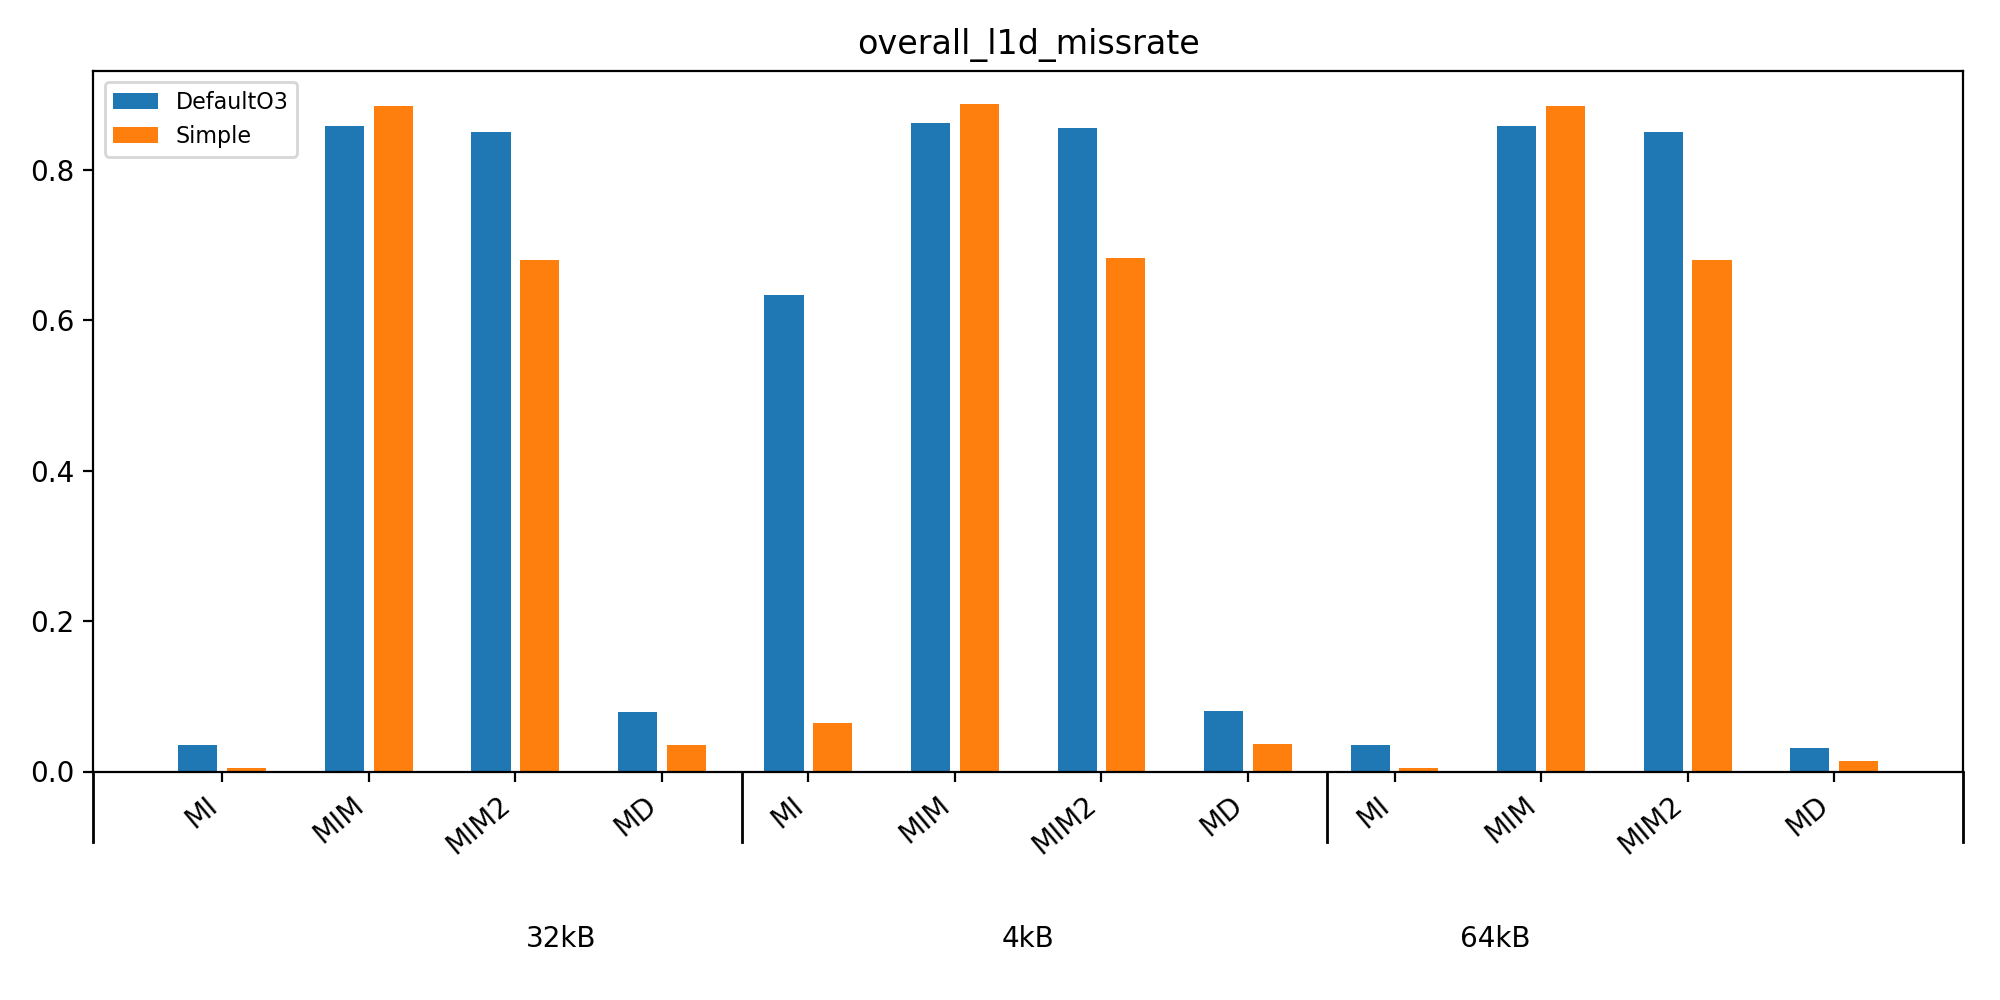

In [21]:
benchmarks = Memory_L1_cache_performance
benchmark_names = Memory_L1_cache_performance_names
size = L1D_size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
fig1 = doplot_memory_benchmarks(size,benchmarks,benchmark_names,'overall_l1d_missrate',norm=False)
plt.ylabel('')
plt.legend(loc=2, prop={'size': 8})
plt.title('overall_l1d_missrate')
plt.tight_layout()
plt.savefig('overall_l1d_missrate_L1DCachebenchmark.png', format='png', dpi=600)

<IPython.core.display.Javascript object>


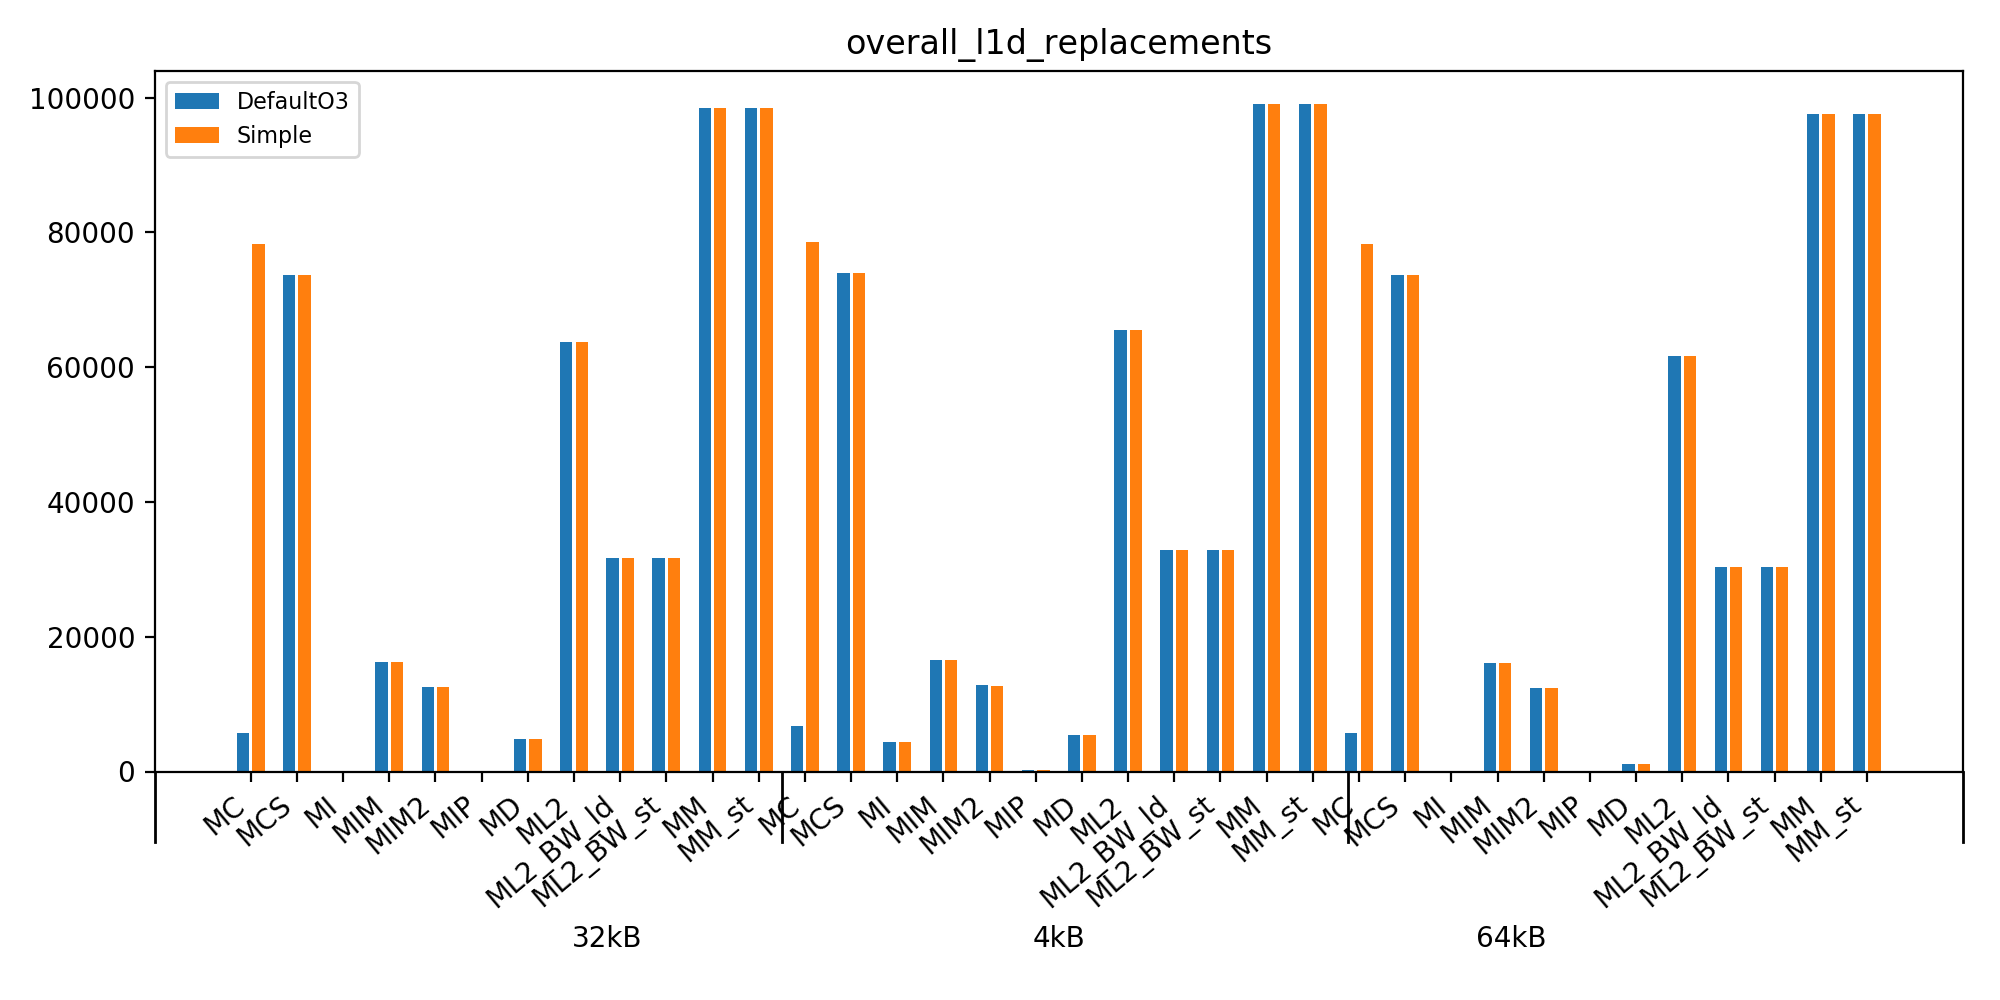

In [22]:
benchmarks = all_Memory_System_benchmarks
benchmark_names = all_Memory_System_benchmarks_names
size = L1D_size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
fig1 = doplot_memory_benchmarks(size,benchmarks,benchmark_names,'l1d_replacements',norm=False)
plt.ylabel('')
plt.legend(loc=2, prop={'size': 8})
plt.title('overall_l1d_replacements')
plt.tight_layout()
plt.savefig('overall_l1d_missrate_l1d_replacements.png', format='png', dpi=600)